In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

In [25]:
# 1. ETL - Extração
try:
    df = pd.read_csv('academia_redfit.csv')
    print("Dados carregados com sucesso!")
    print(f"Shape dos dados: {df.shape}")
    print("\nPrimeiras 5 linhas:")
    print(df.head())
    print(f"\nColunas disponíveis: {list(df.columns)}")
    print(f"\nValores nulos por coluna:")
    print(df.isnull().sum())
except FileNotFoundError:
    print("Arquivo 'academia_redfit.csv' não encontrado!")
    print("Por favor, certifique-se de que o arquivo está no diretório correto.")
    exit()

Dados carregados com sucesso!
Shape dos dados: (51, 12)

Primeiras 5 linhas:
   idade       sexo  frequencia_semanal_treino tipo_atividade  \
0     48      Outro                        7.0        Natação   
1     30      Outro                        7.0           Yoga   
2     35  Masculino                        5.0         Cardio   
3     43      Outro                        3.0           Yoga   
4     37  Masculino                        0.0       CrossFit   

   tempo_medio_exercicio  minutos_totais_semana  preco_plano  \
0                   45.3                  317.1       188.47   
1                   98.1                  686.7       198.07   
2                   33.9                  169.5       154.90   
3                   75.6                  226.8       250.79   
4                  114.0                    0.0       168.02   

  possui_nutricionista  primeiro_PGC  ultimo_PGC data_matricula      estado  
0                  Não          39.5        24.9     2021-07-28      

In [26]:
# 2. ETL - Transformação
print("\nIniciando transformação dos dados...")

numeric_columns = ['frequencia_semanal_treino', 'tempo_medio_exercicio', 'minutos_totais_semana']
for col in numeric_columns:
    if col in df.columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f"Preenchidos valores nulos em {col} com mediana: {median_value}")

if 'sexo' in df.columns:
    df['sexo'] = df['sexo'].str.capitalize()
    print("Sexo padronizado")

if 'estado' in df.columns:
    df['estado'] = df['estado'].str.capitalize()
    print("Estado padronizado")

if 'tipo_atividade' in df.columns:
    df['tipo_atividade'] = df['tipo_atividade'].str.capitalize()
    print("Tipo de atividade padronizado")

if 'data_matricula' in df.columns:
    df['data_matricula'] = pd.to_datetime(df['data_matricula'], errors='coerce')
    print("Data de matrícula convertida para datetime")

# Calcular IMC estimado (se houver peso e altura e não há ...)
# Como utilizei as medidas reais não será mostrado o resultado, pois o arquivo csv não apresenta os dados corretos, poxa era pra ter ...
if 'peso' in df.columns and 'altura' in df.columns:
    df['imc_estimado'] = df['peso'] / (df['altura'] ** 2)
    print("IMC estimado calculado")

if 'primeiro_PGC' in df.columns and 'ultimo_PGC' in df.columns:
    df['evolucao_pgc'] = df['primeiro_PGC'] - df['ultimo_PGC']
    print("Evolução PGC calculada")

print(f"\nDados após transformação: {df.shape}")


Iniciando transformação dos dados...
Preenchidos valores nulos em frequencia_semanal_treino com mediana: 4.0
Preenchidos valores nulos em tempo_medio_exercicio com mediana: 81.0
Preenchidos valores nulos em minutos_totais_semana com mediana: 211.0
Sexo padronizado
Estado padronizado
Tipo de atividade padronizado
Data de matrícula convertida para datetime
Evolução PGC calculada

Dados após transformação: (51, 13)


In [27]:
# 3. ETL - Carga
df.to_csv('academia_redfit_cleaned.csv', index=False)
print("Dados limpos salvos em 'academia_redfit_cleaned.csv'")

Dados limpos salvos em 'academia_redfit_cleaned.csv'



Gerando visualizações...


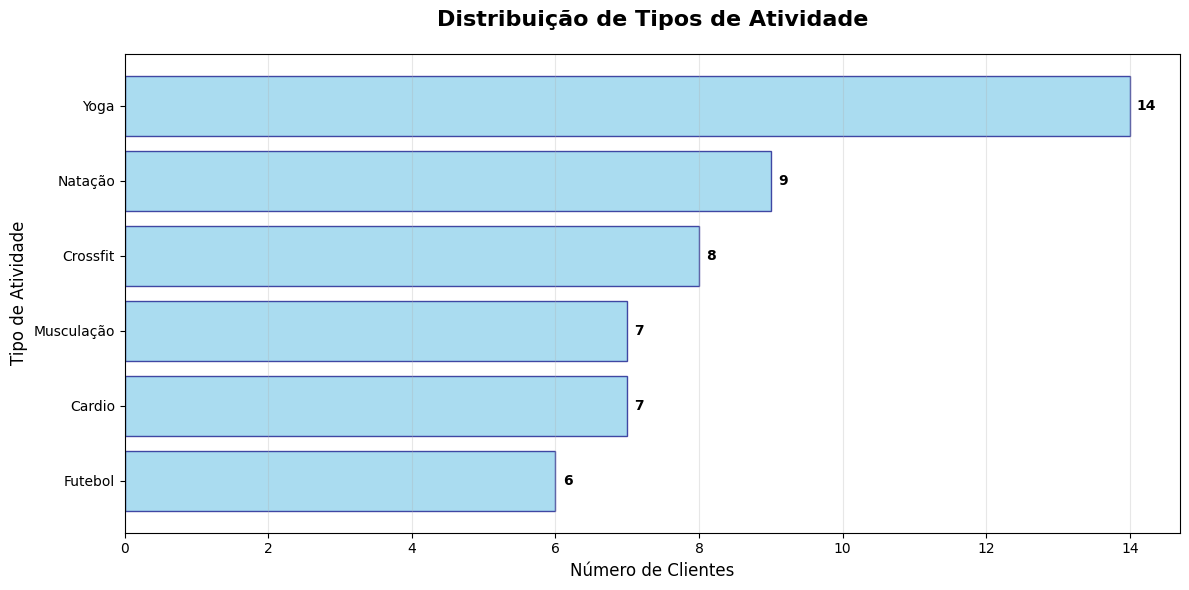

Gráfico de barras salvo: distribuicao_tipo_atividade.png


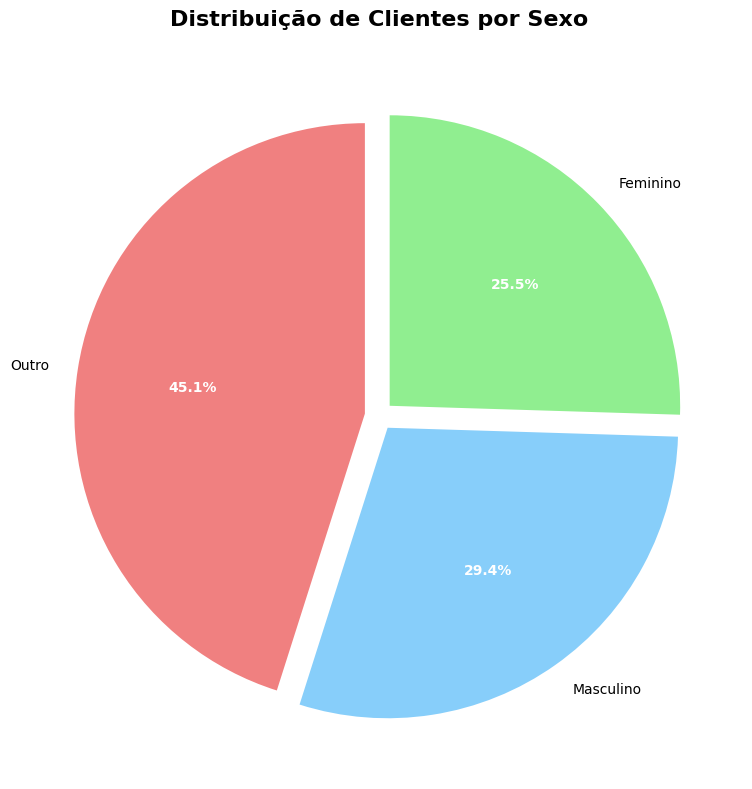

Gráfico de pizza salvo: distribuicao_sexo.png


In [28]:
# 4. Análise de Dados e Visualização com Matplotlib
print("\nGerando visualizações...")

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

# Gráfico de Barras: Distribuição de Tipos de Atividade
if 'tipo_atividade' in df.columns:
    plt.figure(figsize=(12, 6))
    tipo_counts = df['tipo_atividade'].value_counts().sort_values(ascending=True)
    bars = plt.barh(range(len(tipo_counts)), tipo_counts.values, color='skyblue', edgecolor='navy', alpha=0.7)
    plt.yticks(range(len(tipo_counts)), tipo_counts.index)
    plt.title('Distribuição de Tipos de Atividade', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Número de Clientes', fontsize=12)
    plt.ylabel('Tipo de Atividade', fontsize=12)

    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                f'{int(width)}', ha='left', va='center', fontweight='bold')

    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('distribuicao_tipo_atividade.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Gráfico de barras salvo: distribuicao_tipo_atividade.png")

# Gráfico de Pizza: Distribuição por Sexo
if 'sexo' in df.columns:
    plt.figure(figsize=(10, 8))
    sexo_counts = df['sexo'].value_counts()
    colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'plum']
    wedges, texts, autotexts = plt.pie(sexo_counts.values,
                                      labels=sexo_counts.index,
                                      autopct='%1.1f%%',
                                      colors=colors[:len(sexo_counts)],
                                      startangle=90,
                                      explode=[0.05] * len(sexo_counts))

    plt.title('Distribuição de Clientes por Sexo', fontsize=16, fontweight='bold', pad=20)

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('distribuicao_sexo.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Gráfico de pizza salvo: distribuicao_sexo.png")


Análise exploratória dos dados:
Estatísticas descritivas:
           idade  frequencia_semanal_treino  tempo_medio_exercicio  \
count  51.000000                  51.000000              51.000000   
mean   39.392157                   3.549020              76.864706   
min    20.000000                   0.000000              21.900000   
25%    31.500000                   2.000000              50.600000   
50%    37.000000                   4.000000              81.000000   
75%    49.500000                   5.000000              98.200000   
max    64.000000                   7.000000             119.600000   
std    12.842240                   2.300554              27.894851   

       minutos_totais_semana  preco_plano  primeiro_PGC  ultimo_PGC  \
count              51.000000    51.000000     51.000000   51.000000   
mean              261.670588   170.774706     23.872549   22.280392   
min                 0.000000    53.650000     10.200000   10.600000   
25%               112.0000

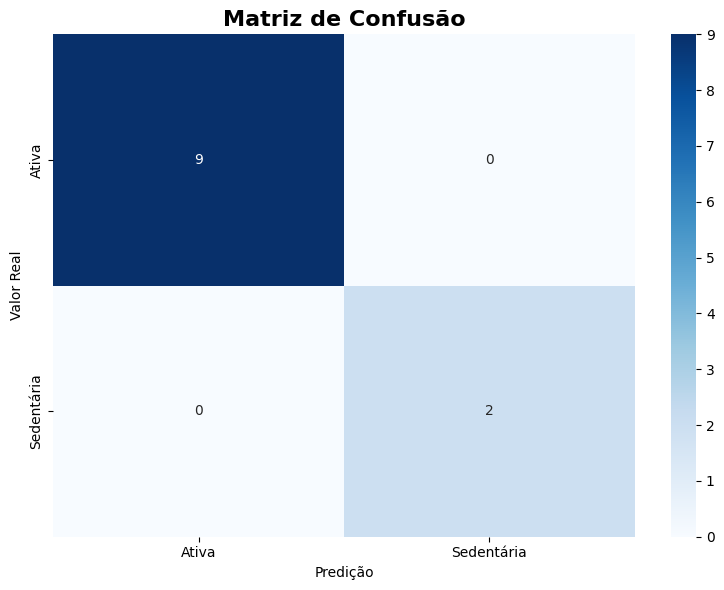

Matriz de confusão salva: matriz_confusao.png


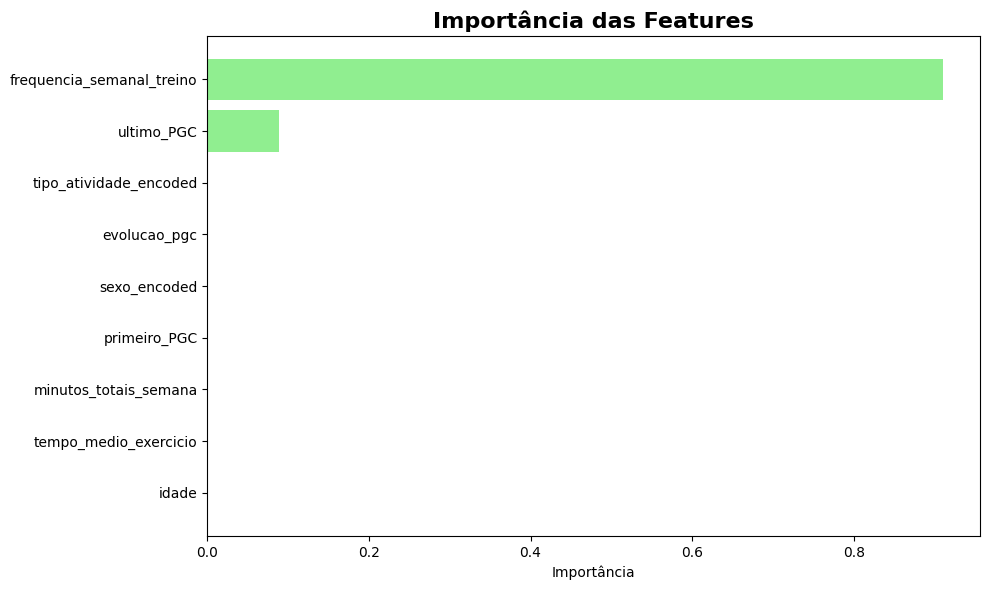

Importância das features salva: feature_importance.png


In [29]:
# 5. Análise Exploratória Adicional
print("\nAnálise exploratória dos dados:")
print(f"Estatísticas descritivas:")
print(df.describe())

# 6. Preparação dos dados para Machine Learning
print("\nPreparando dados para Machine Learning...")

if 'estado' not in df.columns:
    print("Coluna 'estado' não encontrada. Criando classificação baseada em outras métricas...")
    if 'frequencia_semanal_treino' in df.columns and 'tempo_medio_exercicio' in df.columns:
        def classificar_atividade(row):
            freq = row.get('frequencia_semanal_treino', 0)
            tempo = row.get('tempo_medio_exercicio', 0)

            if freq >= 5 and tempo >= 60:
                return 'Atleta'
            elif freq >= 3 and tempo >= 30:
                return 'Ativa'
            else:
                return 'Sedentária'

        df['estado'] = df.apply(classificar_atividade, axis=1)
        print("Classificação de atividade criada automaticamente")

feature_columns = []
for col in ['idade', 'frequencia_semanal_treino', 'tempo_medio_exercicio',
           'minutos_totais_semana', 'primeiro_PGC', 'ultimo_PGC', 'evolucao_pgc', 'imc_estimado']:
    if col in df.columns:
        feature_columns.append(col)

categorical_features = ['sexo', 'tipo_atividade', 'plano']
label_encoders = {}

for col in categorical_features:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col].fillna('Unknown'))
        feature_columns.append(f'{col}_encoded')
        label_encoders[col] = le
        print(f"{col} codificado")

print(f"Features selecionadas: {feature_columns}")

if 'estado' in df.columns and feature_columns:
    df_clean = df[feature_columns + ['estado']].dropna()

    X = df_clean[feature_columns]
    y = df_clean['estado']

    print(f"Dados para treinamento: {X.shape}")
    print(f"Distribuição das classes:")
    print(y.value_counts())

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )



    # 7. Treinamento do Modelo
    print("\nTreinando modelo de classificação...")

    dt_classifier = DecisionTreeClassifier(
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2
    )

    dt_classifier.fit(X_train, y_train)


# 8. Avaliação do Modelo
    print("\nAvaliação do modelo:")

    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {accuracy:.2%}")

    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))


    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=dt_classifier.classes_,
                yticklabels=dt_classifier.classes_)
    plt.title('Matriz de Confusão', fontsize=16, fontweight='bold')
    plt.ylabel('Valor Real')
    plt.xlabel('Predição')
    plt.tight_layout()
    plt.savefig('matriz_confusao.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Matriz de confusão salva: matriz_confusao.png")


    if len(feature_columns) > 0:
        plt.figure(figsize=(10, 6))
        feature_importance = pd.DataFrame({
            'feature': feature_columns,
            'importance': dt_classifier.feature_importances_
        }).sort_values('importance', ascending=True)

        plt.barh(feature_importance['feature'], feature_importance['importance'], color='lightgreen')
        plt.title('Importância das Features', fontsize=16, fontweight='bold')
        plt.xlabel('Importância')
        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("Importância das features salva: feature_importance.png")

In [31]:
# 9. Função de Predição para Novos Dados
def prever_atividade(dados_cliente):
    """
    Função para prever o nível de atividade de um novo cliente
    dados_cliente: dict com as features do cliente
    """
    df_novo = pd.DataFrame([dados_cliente])

    for col in categorical_features:
        if col in df_novo.columns and col in label_encoders:
            df_novo[f'{col}_encoded'] = label_encoders[col].transform(df_novo[col].fillna('Unknown'))
    X_novo = df_novo[feature_columns].fillna(0)
    predicao = dt_classifier.predict(X_novo)[0]
    probabilidade = dt_classifier.predict_proba(X_novo)[0]

    return {
        'predicao': predicao,
        'probabilidades': dict(zip(dt_classifier.classes_, probabilidade))
    }

print("\nModelo treinado com sucesso!")
print("Use a função 'prever_atividade(dados_cliente)' para fazer novas predições")

print("\nAnálise completa finalizada!")
print("Arquivos gerados:")
print("   - academia_redfit_cleaned.csv")
print("   - distribuicao_tipo_atividade.png")
print("   - distribuicao_sexo.png")
print("   - matriz_confusao.png")
print("   - feature_importance.png")


Modelo treinado com sucesso!
Use a função 'prever_atividade(dados_cliente)' para fazer novas predições

Análise completa finalizada!
Arquivos gerados:
   - academia_redfit_cleaned.csv
   - distribuicao_tipo_atividade.png
   - distribuicao_sexo.png
   - matriz_confusao.png
   - feature_importance.png
